In [1018]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1019]:
data = pd.read_csv("H:\Downloads\moncompteformation_formations_engagees.csv",sep=";")
pd.set_option("display.max_columns",None)
data=data.drop(data.columns[20:-9],axis=1)
data.head()

,date_chargement,date validation,statut_dossier,type_referentiel,type_formation2,code_rs,code_rncp,domaine_formation_nsf,formacode_principal,libelle_formacode_principal,modalite_presence,region_lieu_formation,departement_lieu_formation,nb_dossiers,nb_titulaires,prix_moyen,nb_dossiers_a_duree_connue,duree_moyenne,montant_engage,part_france_competences,Code Officiel Département,Code Officiel Région,Nom Officiel Département Majuscule,année de validation,code_certifinfo,intitule_certification,code_region_lieu_formation,code_postal_lieu_formation,Mois de validation
0,2023-11-02,2023-01,Clos - Réalisation Totale,RS,NaN,5055,-1,"Transports, manutention, magasinage",NaN,Sécurité manutention|Chariot automoteur,En présentiel,Provence-Alpes-Côte d'Azur,Var,2,2,295,2,7.0,589,589,83,93.0,VAR,2023,106691.0,Certificat d'aptitude à conduire en sécurité (...,93,83140,1
1,2023-11-02,2023-01,Clos - Réalisation Totale,RS,NaN,5054,-1,"Transports, manutention, magasinage",NaN,Sécurité manutention|Chariot automoteur,En présentiel,Nouvelle-Aquitaine,Charente,5,5,956,5,23.0,4782,4338,16,75.0,CHARENTE,2023,106699.0,Certificat d'aptitude à conduire en sécurité (...,75,16440,1
2,2023-11-02,2023-01,Clos - Réalisation Totale,RS,NaN,5054,-1,"Transports, manutention, magasinage",NaN,Sécurité manutention|Chariot automoteur,En présentiel,Provence-Alpes-Côte d'Azur,Bouches-du-Rhône,3,3,482,3,21.0,1445,1445,13,93.0,BOUCHES DU RHONE,2023,106699.0,Certificat d'aptitude à conduire en sécurité (...,93,13340,1
3,2023-11-02,2023-01,Clos - Réalisation Totale,RS,NaN,5060,-1,"Transports, manutention, magasinage",NaN,Sécurité manutention|Chariot automoteur,En présentiel,Auvergne-Rhône-Alpes,Isère,2,2,1308,2,21.0,2616,2354,38,84.0,ISERE,2023,106703.0,Certificat d'aptitude à conduire en sécurité (...,84,38150,1
4,2023-11-02,2023-01,Clos - Réalisation Totale,RS,NaN,5060,-1,"Transports, manutention, magasinage",NaN,Sécurité manutention|Chariot automoteur,En présentiel,Auvergne-Rhône-Alpes,Loire,2,2,660,2,21.0,1320,1320,42,84.0,LOIRE,2023,106703.0,Certificat d'aptitude à conduire en sécurité (...,84,42100,1


plot()

In [1020]:
data["date validation"]=pd.to_datetime(data["date validation"])
date_count=data.value_counts("date validation")
date_count.head()

date validation
2021-09-01    40765
2021-06-01    40713
2021-03-01    39562
2021-10-01    38671
2021-07-01    38135
Name: count, dtype: int64

<Axes: title={'center': 'Training sessions over time'}, xlabel='Date', ylabel='Number of training session'>

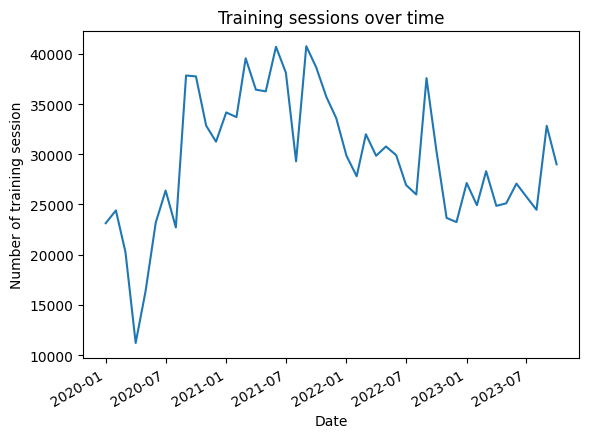

In [1021]:
date_count.plot(kind="line" , title="Training sessions over time" , xlabel="Date" , ylabel="Number of training session")

Lambda

In [1022]:
Region=data[["code_region_lieu_formation","region_lieu_formation"]]
Region.head()

,code_region_lieu_formation,region_lieu_formation
0,93,Provence-Alpes-Côte d'Azur
1,75,Nouvelle-Aquitaine
2,93,Provence-Alpes-Côte d'Azur
3,84,Auvergne-Rhône-Alpes
4,84,Auvergne-Rhône-Alpes


In [1023]:
Region["Nom region Majuscule"] = Region["region_lieu_formation"].apply(lambda x: x.upper())
Region.head()

,code_region_lieu_formation,region_lieu_formation,Nom region Majuscule
0,93,Provence-Alpes-Côte d'Azur,PROVENCE-ALPES-CÔTE D'AZUR
1,75,Nouvelle-Aquitaine,NOUVELLE-AQUITAINE
2,93,Provence-Alpes-Côte d'Azur,PROVENCE-ALPES-CÔTE D'AZUR
3,84,Auvergne-Rhône-Alpes,AUVERGNE-RHÔNE-ALPES
4,84,Auvergne-Rhône-Alpes,AUVERGNE-RHÔNE-ALPES


In [1024]:
data["date_chargement"]=data["date_chargement"].apply(lambda a:str(a).replace("-","/"))
data["date_chargement"].head()

0    2023/11/02
1    2023/11/02
2    2023/11/02
3    2023/11/02
4    2023/11/02
Name: date_chargement, dtype: object

Value counts

In [1025]:
modalite_presence=data.value_counts("modalite_presence").reset_index()
modalite_presence 

,modalite_presence,count
0,En présentiel,860745
1,Mixte,318761
2,A distance,182428


In [1026]:
statut_dossier=data.value_counts("statut_dossier").reset_index()
statut_dossier

,statut_dossier,count
0,Clos - Réalisation Totale,800134
1,Clos - Non Réalisé annulé titulaire,144418
2,Clos - Non Réalisé annulé OF,141461
3,Clos - Réalisation Partielle,115214
4,Entrée en formation,96893
5,Validé,48192
6,Sortie de formation,15420
7,Dossier annulé gestionnaire,151
8,Rejeté,51


Groupby

In [1027]:
pd.set_option("display.precision",2)
duree=data.groupby("Nom Officiel Département Majuscule")["duree_moyenne"].mean().reset_index()
duree.sort_values("duree_moyenne")

,Nom Officiel Département Majuscule,duree_moyenne
67,MAYOTTE,39.70
19,CORSE DU SUD,40.53
63,MANCHE,48.60
40,HAUTE MARNE,49.07
0,AIN,50.02
...,...,...
33,GIRONDE,111.51
30,FINISTERE,113.26
16,CHARENTE MARITIME,116.74
97,VIENNE,125.33


In [1028]:
dossiers=pd.DataFrame(data.groupby(["modalite_presence","statut_dossier"])["nb_dossiers"].sum())
dossiers.columns=["Number of files"]
dossiers.reset_index(inplace=True)
dossiers

,modalite_presence,statut_dossier,Number of files
0,A distance,Clos - Non Réalisé annulé OF,169957
1,A distance,Clos - Non Réalisé annulé titulaire,243893
2,A distance,Clos - Réalisation Partielle,282594
3,A distance,Clos - Réalisation Totale,2235306
4,A distance,Dossier annulé gestionnaire,736
5,A distance,Entrée en formation,174547
6,A distance,Rejeté,2319
7,A distance,Sortie de formation,25717
8,A distance,Validé,65415
9,En présentiel,Clos - Non Réalisé annulé OF,176227


Pivot table

In [1029]:
statut=data[(data["statut_dossier"]=="Sortie de formation") | (data["statut_dossier"]=="Entrée en formation")]

In [1030]:
modal=pd.DataFrame(statut.groupby(["modalite_presence","statut_dossier"])["statut_dossier"].count())
modal.columns=["count"]
modal.reset_index(inplace=True)
modal

,modalite_presence,statut_dossier,count
0,A distance,Entrée en formation,16107
1,A distance,Sortie de formation,3168
2,En présentiel,Entrée en formation,39082
3,En présentiel,Sortie de formation,7880
4,Mixte,Entrée en formation,41704
5,Mixte,Sortie de formation,4372


In [1031]:
pivot_table = pd.pivot_table(modal, values="count", index="modalite_presence",columns="statut_dossier").reset_index()
pivot_table

statut_dossier,modalite_presence,Entrée en formation,Sortie de formation
0,A distance,16107.0,3168.0
1,En présentiel,39082.0,7880.0
2,Mixte,41704.0,4372.0


In [1032]:
pivot_table_eng=pivot_table.replace({"A distance":"Online","En présentiel":"Face-to-Face","Mixte":"Mixed"})

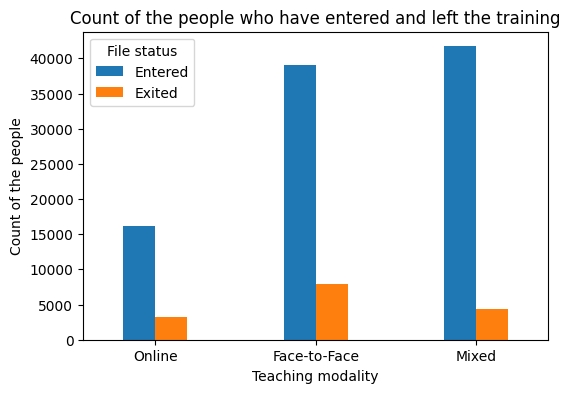

In [1033]:
pivot_table_eng.plot(kind="bar", width=0.4, figsize=(6, 4),x="modalite_presence")

plt.xlabel("Teaching modality")
plt.ylabel("Count of the people")
plt.title("Count of the people who have entered and left the training")

plt.legend(title="File status" , labels=("Entered","Exited") )
plt.xticks(rotation=0)

plt.show()

Melt()

In [1034]:
melted=pivot_table.melt(id_vars=["modalite_presence"],value_vars=["Entrée en formation","Sortie de formation"]).reset_index()
melted

,index,modalite_presence,statut_dossier,value
0,0,A distance,Entrée en formation,16107.0
1,1,En présentiel,Entrée en formation,39082.0
2,2,Mixte,Entrée en formation,41704.0
3,3,A distance,Sortie de formation,3168.0
4,4,En présentiel,Sortie de formation,7880.0
5,5,Mixte,Sortie de formation,4372.0


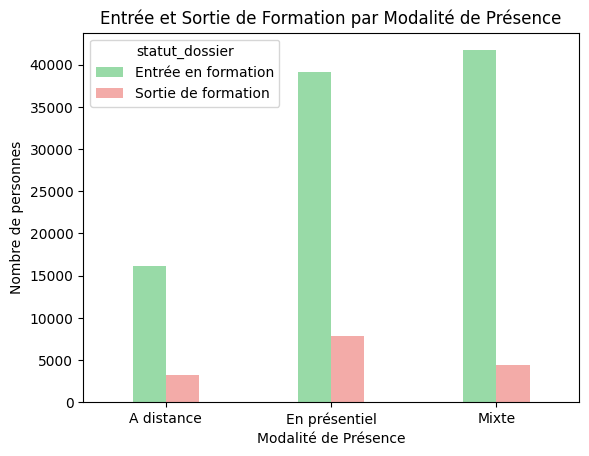

In [1035]:
palette = sns.color_palette("pastel")

hue_colors={"Entrée en formation":palette[2] , "Sortie de formation":palette[3]}

sns.barplot(data=melted, x='modalite_presence', y='value', hue='statut_dossier',width=0.4, palette=hue_colors).set(
    title="Entrée et Sortie de Formation par Modalité de Présence" , xlabel="Modalité de Présence" , ylabel="Nombre de personnes")

plt.show()

In [1036]:
ile_de_france=["PARIS","HAUTS DE SEINE","SEINE SAINT DENIS","VAL DE MARNE","ESSONNE","YVELINES","VAL D OISE","SEINE ET MARNE"]

In [1037]:
data=data[data["Nom Officiel Département Majuscule"].isin(ile_de_france)]

In [1038]:
idf=data.groupby("Nom Officiel Département Majuscule")["montant_engage"].mean().reset_index()
idf=idf.sort_values("montant_engage",ascending=False)
idf

,Nom Officiel Département Majuscule,montant_engage
2,PARIS,8019.23
4,SEINE SAINT DENIS,7856.06
1,HAUTS DE SEINE,6911.09
6,VAL DE MARNE,5754.07
0,ESSONNE,5338.27
5,VAL D OISE,5165.73
3,SEINE ET MARNE,4695.02
7,YVELINES,4294.17


In [1039]:
idf.columns=["Department","Montant_engage"]
idf

,Department,Montant_engage
2,PARIS,8019.23
4,SEINE SAINT DENIS,7856.06
1,HAUTS DE SEINE,6911.09
6,VAL DE MARNE,5754.07
0,ESSONNE,5338.27
5,VAL D OISE,5165.73
3,SEINE ET MARNE,4695.02
7,YVELINES,4294.17


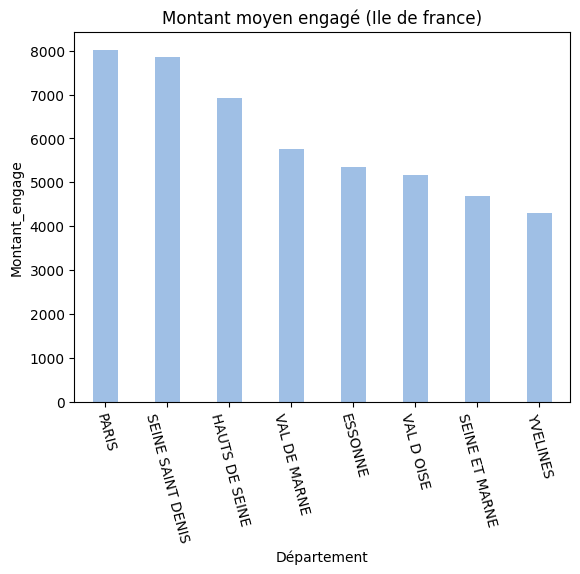

In [1040]:
sns.barplot(data=idf,x="Department",y="Montant_engage",width=0.4,color="#93BEF1").set(
    title="Montant moyen engagé (Ile de france)",xlabel="Département")
plt.xticks(rotation=-75)
plt.show()

In [1041]:
sty=data[["Nom Officiel Département Majuscule","prix_moyen","montant_engage"]].head(20)
sty.style.background_gradient()


,Nom Officiel Département Majuscule,prix_moyen,montant_engage
15,PARIS,2412,2412
23,PARIS,1680,3360
27,PARIS,1821,1821
28,SEINE SAINT DENIS,1274,68806
40,PARIS,2160,4320
45,ESSONNE,600,1200
47,YVELINES,1040,2080
51,PARIS,900,1800
54,PARIS,348,1045
55,PARIS,2470,2470


merge()

In [1042]:
idf2 = pd.read_excel("H:\Documents\Studies\Pandas ex\Île-de-France Demographics & GDP.xlsx") 
idf2

,Department,Area km2,Population,GDP[8],GDP per capita
0,PARIS,105,2133111,€253.101 billion,118653
1,HAUTS DE SEINE,176,1635291,€188.333 billion,115168
2,SEINE SAINT DENIS,236,1668670,€66.227 billion,39688
3,VAL DE MARNE,245,1415367,€56.818 billion,40144
4,VAL D OISE,1246,1256607,€38.861 billion,30925
5,SEINE ET MARNE,5915,1438100,€42.983 billion,29889
6,ESSONNE,1804,1313768,€58.462 billion,44500
7,YVELINES,2284,1456365,€60.058 billion,42238


In [1043]:
îledeFr=pd.merge(idf,idf2,on="Department")
îledeFr

,Department,Montant_engage,Area km2,Population,GDP[8],GDP per capita
0,PARIS,8019.23,105,2133111,€253.101 billion,118653
1,SEINE SAINT DENIS,7856.06,236,1668670,€66.227 billion,39688
2,HAUTS DE SEINE,6911.09,176,1635291,€188.333 billion,115168
3,VAL DE MARNE,5754.07,245,1415367,€56.818 billion,40144
4,ESSONNE,5338.27,1804,1313768,€58.462 billion,44500
5,VAL D OISE,5165.73,1246,1256607,€38.861 billion,30925
6,SEINE ET MARNE,4695.02,5915,1438100,€42.983 billion,29889
7,YVELINES,4294.17,2284,1456365,€60.058 billion,42238
